In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [32]:
# 데이터 로드
data = pd.read_csv('creditcard.csv')
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:


std_scaler = StandardScaler()

features = data.drop('Class', axis=1)
features_scaled = std_scaler.fit_transform(features)

print(features_scaled.shape)

(284807, 30)


In [34]:
transaction_df = pd.DataFrame(features_scaled)

In [48]:
# 2. isolation forest 모델 생성
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=500, contamination=0.0017, max_samples='auto',
                        max_features=0.8, random_state=42)

In [49]:
# 모델 학습
transaction_df['Fraud_score'] = model.fit_predict(features_scaled)


In [51]:
# 이상치 결과 해석 후 분류 표시
transaction_df['Fraud_predicted'] = transaction_df['Fraud_score'].apply(lambda x: 0 if x == 1 else 1)


In [52]:
from sklearn.metrics import classification_report

print(classification_report(data['Class'], transaction_df['Fraud_predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.30      0.31       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807



In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

y = transaction_df['Fraud_predicted']

x_pca = pca.fit_transform(features_scaled)
x_pca = pd.DataFrame(x_pca)
x_pca['Class'] = transaction_df['Fraud_predicted']


In [27]:
print('Explained variance ratio: ', pca.explained_variance_ratio_)
print(x_pca)

Explained variance ratio:  [0.06527521 0.05612313]
               0         1  Class
0       0.416630 -2.532664      0
1      -0.393453 -2.077326      0
2       1.868525 -2.533497      0
3       0.315744 -1.783506      0
4      -0.004379 -1.488415      0
...          ...       ...    ...
284802 -1.493200  1.900149      0
284803 -0.366836  0.842366      0
284804 -0.194063  2.070788      0
284805 -0.466089  1.225394      0
284806  0.767597  1.905903      0

[284807 rows x 3 columns]


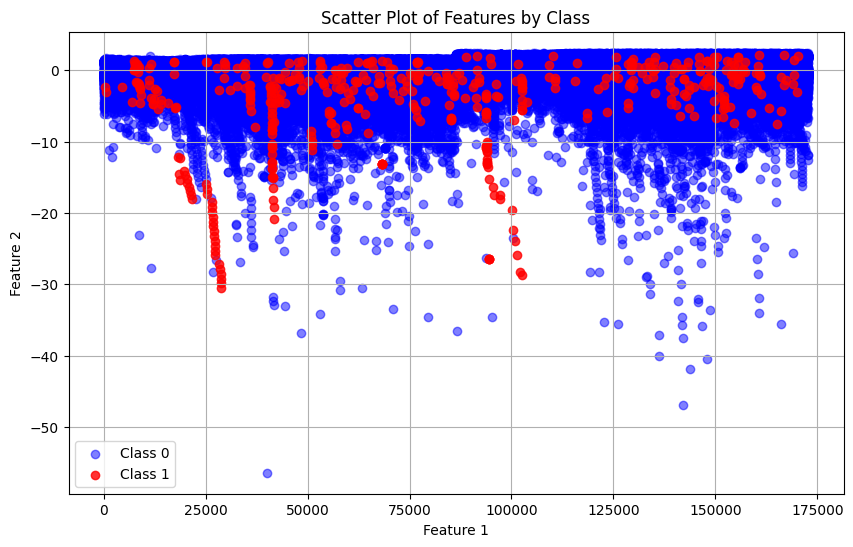

In [29]:
import matplotlib.pyplot as plt

# Class별로 데이터 분리
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], c='blue', label='Class 0', alpha=0.5)
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], c='red', label='Class 1', alpha=0.8)

# 그래프 꾸미기
plt.title('Scatter Plot of Features by Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()